# Clean and Analyze Employee Exit Surveys

In this project, we'll clean and analyze exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)}) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. The TAFE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

We'll pretend our stakeholders want us to combine the results for *both* surveys to answer the following questions:
    
   - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
   - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Introduction

Let's start by importing pandas and NumPy libraries and read the CSV files into pandas.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Assign the datasets into variables
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
# Let's explore the data!
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

After briefly examining both datasets, we think that we should separate between necessary columns that are present in both datasets, but under different names, and non-necessary ones. For instance, `Career move to public sector` and `Career Move - Public Sector`.

In addition, the `dete_survey` dataframe contains `Not States` values that indicate values are missing, but they aren't represented as `NaN`.

## Identify Missing Values and Drop Unnecessary Columns

We are going to handle the `NaN` values and drop the unnecessary columns.

In [7]:
# Change Non Stated as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [8]:
# Drop some unnecessary columns from dete dataset
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

# Drop some unnecessary columns from tafe dataset
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Clean Column Names

Let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. For example, as captured in the DataQuest course:

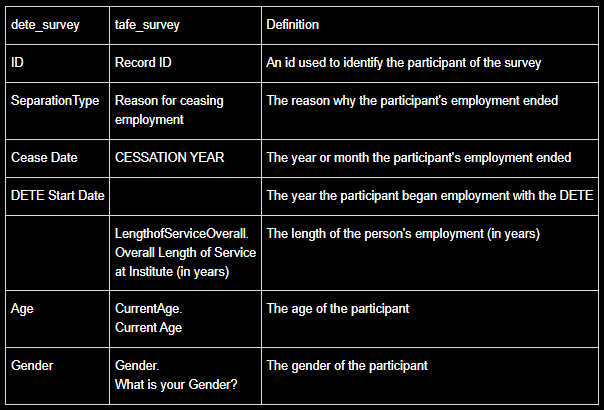

Hence, we are going to "standardize" the columns. For the `dete_survey_updated` dataframe, we are going to update the column names so that they will all be in lowercase, no trailing whitespace from the end of the strongs, and spaces will be replaced by underscores.

In [9]:
# Clean the dete column names
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()

In [10]:
# Check the column names
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
# Clean the tafe column names
tafe_survey_updated = tafe_survey_updated.rename({'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, axis=1)

In [12]:
# Check the column names
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filter the Data

After we renamed the column names, we are going to remove more of the data we don't need. Since we are interested in whether employees resigning are due to some kind of dissatisfaction, we are going to focus on `Resignation` in the `separationtype` column. Note that there are a couple of variation with the string `Resignation`:

- Resignation-Other reasons
- Resignation-Other employer
- Resignation-More overseas/interstate

In [13]:
# Calculate the unique values in the separationtype column
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [15]:
# Include only with 'Resignation' string
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') | (dete_survey_updated['separationtype'] == 'Resignation-Other employer') | (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')].copy()

In [16]:
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [17]:
# Include only with 'Resignation' string
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [18]:
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Verify the Data

Before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major consistencies. We'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.

In [19]:
# View the unique values in the cease_date column
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [20]:
# Using vectorized string methods to extract the year
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

# Change the series into float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

In [21]:
# Check values in dete_resignations
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [22]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [23]:
# Check values in tafe_resignations
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

We do not think there is anything wrong with the data. It is highly unlikely that an employee started working in 1963, but it is still possible. Therefore, we decide not to drop any of the data.

## Create a New Column

Remember our goal is to determine whether employees resigning are due to some kind of dissatisfaction or not. In the `tafe_resignations` dataframe, the `institute_service` column has already reflected the number of years of service. Now, we need to add the same colume in the `dete_resignations` dataframe. We can arrive at the number of years of service by subtracting `dete_start_date` from `cease_date` column.

In [24]:
# Create a new column in the dete_resignations dataframe
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [25]:
# Calculate the number of unique value in institute_service
dete_resignations['institute_service'].value_counts().sort_values(ascending=False)

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
8.0      8
13.0     8
20.0     7
15.0     7
17.0     6
10.0     6
22.0     6
12.0     6
14.0     6
18.0     5
16.0     5
11.0     4
23.0     4
24.0     4
39.0     3
21.0     3
19.0     3
32.0     3
25.0     2
28.0     2
26.0     2
30.0     2
36.0     2
27.0     1
34.0     1
29.0     1
42.0     1
33.0     1
41.0     1
38.0     1
49.0     1
35.0     1
31.0     1
Name: institute_service, dtype: int64

## Identify Dissatisfied Employees

After we create a new column for the number of years of service, we'll identify any employees who resigned because they were dissatisfied.  Here is the categorization for dissatisfied reasons:

   1. tafe_resignations:
       - `Contributing Factors. Dissatisfaction`
       - `Contributing Factors. Job Dissatisfaction`
   2.  dafe_resignations:
       - `job_dissatisfaction`
       - `dissatisfaction_with_the_department`
       - `physical_work_environment`
       - `lack_of_recognition`
       - `lack_of_job_security`
       - `work_location`
       - `employment_conditions`
       - `work_life_balance`
       - `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column. After our changes, the new `dissatisfied` column will contain just the following values:

   - `True`: indicates a person resigned because they were dissatisfied in some way
   - `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
   - `NaN`: indicates the value is missing

In [26]:
# Count the unique values of dissatisfaction
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [27]:
# Count the unique values of job dissatisfaction
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [29]:
# Define a function to be applied during the replacement
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

# Replace values in the entire DataFrame
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
print(tafe_resignations_up['dissatisfied'].value_counts(dropna=False))

False    241
True      99
Name: dissatisfied, dtype: int64


In [30]:
# Update the value for dete_resignations
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combine the Data

Our end goal is to aggregate the data according to the `institute_service` column, so when you combine the data, think about how to get the data into a form that's easy to aggregate.

In [31]:
# Add a column named institute to dete_resignations_up and tafe_resignations_up
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [32]:
# Combine the index
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [33]:
# Drop any columns with less than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [34]:
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
5,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
8,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
9,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE
...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


## Clean the Service Column

Next, we'll have to clean up the `institute_service` column. This column is tricky to clean because it currently contains values in a couple different forms:

In [35]:
# Check the unique values
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


To analyze the data, we'll convert these numbers into categories. We'll base our analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:
 - New: Less than 3 years in the workplace
 - Experienced: 3-6 years in the workplace
 - Established: 7-10 years in the workplace
 - Veteran: 11 or more years in the workplace

In [36]:
# Change the Series to str and extract the years
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)') # Extract any digit character, one or more word
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

In [41]:
# Create a function to convert the value
def map_categories(x):
    if x < 3:
        return 'New'
    elif x >= 3 and x <= 6:
        return 'Experienced'
    elif x >= 7 and x <= 10:
        return 'Established'
    elif pd.isnull(x):
        return np.nan
    else:
        return 'Veteran'

In [42]:
# Map the function
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(map_categories)

In [43]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Perform Initial Analysis

Recall that the `dissatisfied` column consists of Boolean values, meaning they are either `True` or `False`. Methods such as the pivot table method actually treat Boolean values as integers, so a `True` value is considered to be `1` and `False` value is considered to be `0`. That means we can aggregate the `dissatisfied` column and calculate the number of people in each group, the percentage of people in each group, etc.

In [44]:
# Calculate the number of True and False in the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [76]:
# Create a pivot table
pivot_table_service = combined_updated.pivot_table(index='service_cat') # We don't use the aggfunc since the default aggfunc is mean

In [77]:
pivot_table_service

,age_up,cease_date,dissatisfied,id,institute_service_up
service_cat,,,,,
Established,38.500000,2012.258065,0.516129,2.149465e+17,7.870968
Experienced,36.883721,2011.988372,0.343023,3.542057e+17,4.040698
New,34.609375,2011.766839,0.295337,4.504700e+17,0.968912
Veteran,48.296296,2012.261194,0.485294,1.679548e+17,19.183824


In [48]:
# Import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='service_cat'>

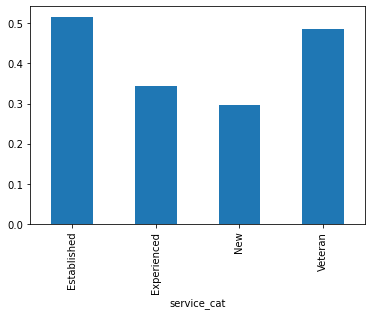

In [78]:
# Plot the pivot table
pivot_table_service['dissatisfied'].plot(kind='bar')

We can answer the following question:
   - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Only 30% new employees, which are classified as those who work within three years, resigned due to some kind of dissatisfaction. However, as employees work longer, this dissatisfaction factor is becoming a more prominent factor for them to resign. Next, we are going to clean the `age` column.

In [54]:
# Calculate the unique value of age
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [69]:
# Extract the age
combined_updated['age_up'] = combined_updated['age'].astype('str').str.extract(r'(\d+)').astype('float')

In [70]:
# Calculate the unique value
combined_updated['age_up'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
NaN     55
61.0    23
20.0    10
Name: age_up, dtype: int64

In [71]:
# Find the median of the series
combined_updated['age_up'].median()

41.0

In [72]:
# Replace the NaN values with the median value
combined_updated['age_up'].fillna(41).value_counts()

41.0    148
46.0     81
36.0     73
51.0     71
26.0     67
21.0     62
31.0     61
56.0     55
61.0     23
20.0     10
Name: age_up, dtype: int64

Next, we are going to classify those age into groups. This is solely based on our judgement, so we are going to classify based on decade:

 - 20-30
 - 31-40
 - 41-50
 - 51-60
 - Over 60

In [73]:
# Create a function to classify
def classify_age(x):
    if x >= 20 and x <= 30:
        return '20-30'
    elif x >= 31 and x <= 40:
        return '31-40'
    elif x >= 41 and x <= 50:
        return '41-50'
    elif x >= 51 and x <= 60:
        return '51-60'
    else:
        return 'Over 60'

In [74]:
# Map into the age column
combined_updated['age_cat'] = combined_updated['age_up'].apply(classify_age)

In [75]:
# Calculate the unique value
combined_updated['age_cat'].value_counts(dropna=False)

41-50      174
20-30      139
31-40      134
51-60      126
Over 60     78
Name: age_cat, dtype: int64

In [80]:
# Create a pivot table
pivot_table_age = combined_updated.pivot_table(index='age_cat')
pivot_table_age

,age_up,cease_date,dissatisfied,id,institute_service_up
age_cat,,,,,
20-30,23.338129,2012.065217,0.352518,3.378450e+17,2.712121
31-40,33.723881,2011.954198,0.358209,3.030721e+17,4.844961
41-50,43.327586,2012.011905,0.379310,3.063630e+17,7.376543
51-60,53.182540,2011.983871,0.404762,3.424868e+17,11.333333
Over 60,61.000000,2011.648649,0.435897,4.067442e+17,22.050000


<AxesSubplot:xlabel='age_cat'>

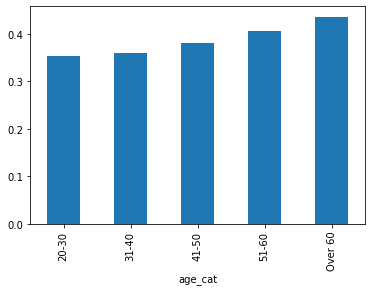

In [81]:
# Plot the data
pivot_table_age['dissatisfied'].plot(kind='bar')

Hence, we can answer the following question:

   - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

From this result, we can see that older people tend to resign because of dissatisfaction. There is no significant increase from the `20-30` group to `31-40`, but this increase by 200bps to 400bps as we are going up to the older classes.

## Conclusion

As we explore and clean the data, we can see that the longer an employee is in the job, the more likely they are going to resign because of some kind of dissatisfaction. Age is also telling the same thing: as an employee is older, the more likely to resign because of dissatisfaction.